# Data Importing/Formatting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./squirrel_census.csv')
df.head(3)

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13


In [3]:
# Get rid of unnecessary features
df = df.drop(['lat_long',
              'highlight_fur_color',
              'combination_of_primary_and_highlight_color',
              'color_notes',
              'specific_location',
              'above_ground_sighter_measurement',
              'other_activities',
              'other_interactions',
              'zip_codes',
              'community_districts',
              'borough_boundaries',
              'city_council_districts',
              'police_precincts'], axis=1)
# Changes 'False' and 'True' to 0 and 1,respectively
df = (df * 1)

print('Shape: ',df.shape)
df.head()

Shape:  (3023, 23)


,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,location,...,eating,foraging,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Ground Plane,...,0,0,0,0,0,0,0,0,0,1
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,Above Ground,...,0,0,0,0,0,0,0,0,1,0
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,Above Ground,...,0,0,0,0,0,0,0,0,0,1
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,Above Ground,...,0,0,1,0,0,0,0,0,0,0


In [4]:
for feat in ['unique_squirrel_id', 'hectare', 'shift', 'age', 'primary_fur_color', 'location']:
    df[feat] = df[feat].astype('category')

df.dtypes

long                        float64
lat                         float64
unique_squirrel_id         category
hectare                    category
shift                      category
date                          int64
hectare_squirrel_number       int64
age                        category
primary_fur_color          category
location                   category
running                       int32
chasing                       int32
climbing                      int32
eating                        int32
foraging                      int32
kuks                          int32
quaas                         int32
moans                         int32
tail_flags                    int32
tail_twitches                 int32
approaches                    int32
indifferent                   int32
runs_from                     int32
dtype: object

In [5]:
# Convert squirrel ID to integer
df.unique_squirrel_id = pd.Categorical(df.unique_squirrel_id)
df.unique_squirrel_id = df.unique_squirrel_id.cat.codes

df.head()

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,location,...,eating,foraging,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from
0,-73.956134,40.794082,1912,37F,PM,10142018,3,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,-73.957044,40.794851,1902,37E,PM,10062018,3,Adult,Gray,Ground Plane,...,0,0,0,0,0,0,0,0,0,1
2,-73.976831,40.766718,1297,02E,AM,10102018,3,Adult,Cinnamon,Above Ground,...,0,0,0,0,0,0,0,0,1,0
3,-73.975725,40.769703,2565,05D,PM,10182018,5,Juvenile,Gray,Above Ground,...,0,0,0,0,0,0,0,0,0,1
4,-73.959313,40.797533,2045,39B,AM,10182018,1,NaN,NaN,Above Ground,...,0,0,1,0,0,0,0,0,0,0


In [6]:
df.location.value_counts()

Ground Plane    2116
Above Ground     843
Name: location, dtype: int64

# Visualization of Categories

## __Activity__

In [7]:
from mpl_toolkits.mplot3d import Axes3D

### _Eating:_

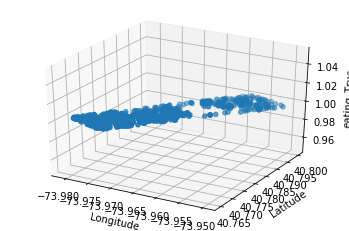

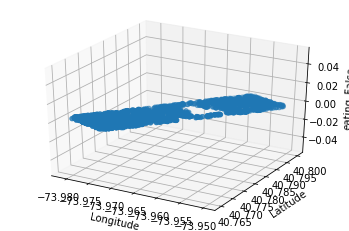

Hectare of Max Eating Value: 14E


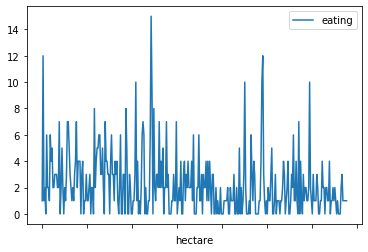

In [8]:
eating_true = df[df['eating'] == 1]
eating_false = df[df['eating'] == 0]

threedee1 = plt.figure().gca(projection='3d')
threedee1.scatter(eating_true['long'], eating_true['lat'], eating_true['eating'])
threedee1.set_xlabel('Longitude')
threedee1.set_ylabel('Latitude')
threedee1.set_zlabel('eating_True')
plt.show()

threedee2 = plt.figure().gca(projection='3d')
threedee2.scatter(eating_false['long'], eating_false['lat'], eating_false['eating'])
threedee2.set_xlabel('Longitude')
threedee2.set_ylabel('Latitude')
threedee2.set_zlabel('eating_False')
plt.show()

eat_t_hec = eating_true.groupby('hectare').count()
ax = eat_t_hec.plot(y='eating')

print('Hectare of Max Eating Value:', eat_t_hec.eating.idxmax())

### _Foraging:_

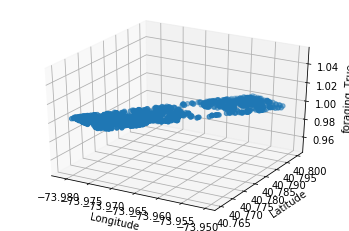

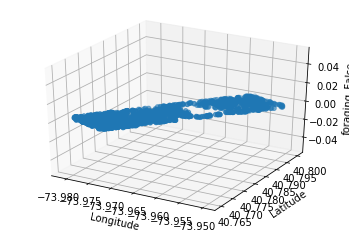

Hectare of Max Foraging Value: 14E


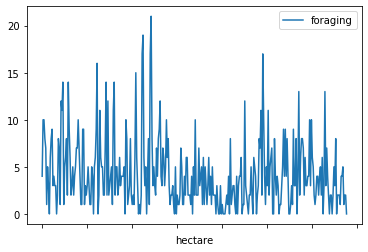

In [9]:
foraging_true = df[df['foraging'] == 1]
foraging_false = df[df['foraging'] == 0]

threedee1 = plt.figure().gca(projection='3d')
threedee1.scatter(foraging_true['long'], foraging_true['lat'], foraging_true['foraging'])
threedee1.set_xlabel('Longitude')
threedee1.set_ylabel('Latitude')
threedee1.set_zlabel('foraging_True')
plt.show()

threedee2 = plt.figure().gca(projection='3d')
threedee2.scatter(foraging_false['long'], foraging_false['lat'], foraging_false['foraging'])
threedee2.set_xlabel('Longitude')
threedee2.set_ylabel('Latitude')
threedee2.set_zlabel('foraging_False')
plt.show()

eat_t_hec = foraging_true.groupby('hectare').count()
ax = eat_t_hec.plot(y='foraging')

print('Hectare of Max Foraging Value:', eat_t_hec.foraging.idxmax())

### _Climbing:_

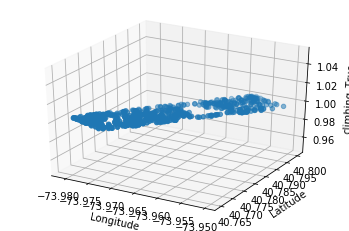

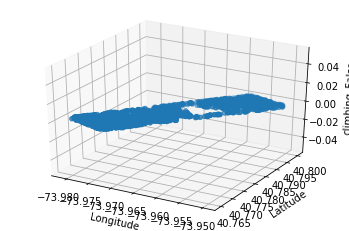

Hectare of Max Climbing Value: 06C


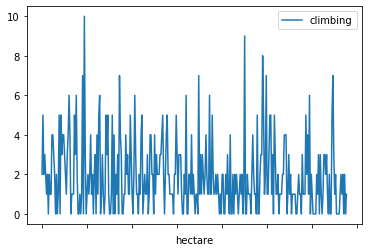

In [10]:
climbing_true = df[df['climbing'] == 1]
climbing_false = df[df['climbing'] == 0]

threedee1 = plt.figure().gca(projection='3d')
threedee1.scatter(climbing_true['long'], climbing_true['lat'], climbing_true['climbing'])
threedee1.set_xlabel('Longitude')
threedee1.set_ylabel('Latitude')
threedee1.set_zlabel('climbing_True')
plt.show()

threedee2 = plt.figure().gca(projection='3d')
threedee2.scatter(climbing_false['long'], climbing_false['lat'], climbing_false['climbing'])
threedee2.set_xlabel('Longitude')
threedee2.set_ylabel('Latitude')
threedee2.set_zlabel('climbing_False')
plt.show()

eat_t_hec = climbing_true.groupby('hectare').count()
ax = eat_t_hec.plot(y='climbing')

print('Hectare of Max Climbing Value:', eat_t_hec.climbing.idxmax())

### _Chasing:_

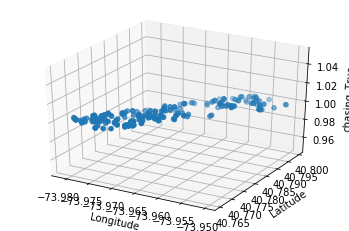

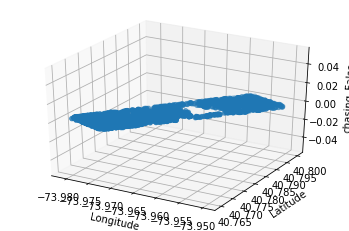

Hectare of Max Chasing Value: 01B


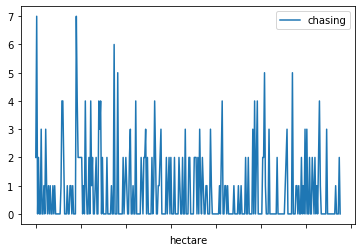

In [11]:
chasing_true = df[df['chasing'] == 1]
chasing_false = df[df['chasing'] == 0]

threedee1 = plt.figure().gca(projection='3d')
threedee1.scatter(chasing_true['long'], chasing_true['lat'], chasing_true['chasing'])
threedee1.set_xlabel('Longitude')
threedee1.set_ylabel('Latitude')
threedee1.set_zlabel('chasing_True')
plt.show()

threedee2 = plt.figure().gca(projection='3d')
threedee2.scatter(chasing_false['long'], chasing_false['lat'], chasing_false['chasing'])
threedee2.set_xlabel('Longitude')
threedee2.set_ylabel('Latitude')
threedee2.set_zlabel('chasing_False')
plt.show()

eat_t_hec = chasing_true.groupby('hectare').count()
ax = eat_t_hec.plot(y='chasing')

print('Hectare of Max Chasing Value:', eat_t_hec.chasing.idxmax())

### _Running:_

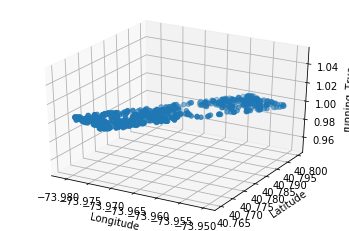

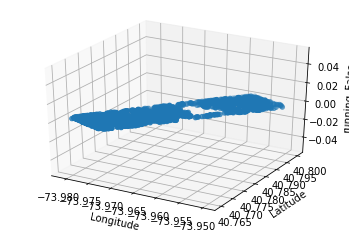

Hectare of Max Running Value: 03D


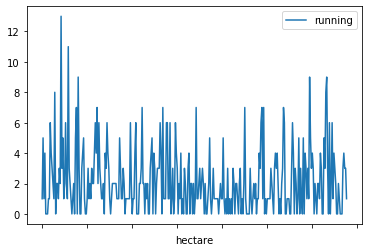

In [12]:
running_true = df[df['running'] == 1]
running_false = df[df['running'] == 0]

threedee1 = plt.figure().gca(projection='3d')
threedee1.scatter(running_true['long'], running_true['lat'], running_true['running'])
threedee1.set_xlabel('Longitude')
threedee1.set_ylabel('Latitude')
threedee1.set_zlabel('running_True')
plt.show()

threedee2 = plt.figure().gca(projection='3d')
threedee2.scatter(running_false['long'], running_false['lat'], running_false['running'])
threedee2.set_xlabel('Longitude')
threedee2.set_ylabel('Latitude')
threedee2.set_zlabel('running_False')
plt.show()

eat_t_hec = running_true.groupby('hectare').count()
ax = eat_t_hec.plot(y='running')

print('Hectare of Max Running Value:', eat_t_hec.running.idxmax())

## Responses

### _Kuks:_

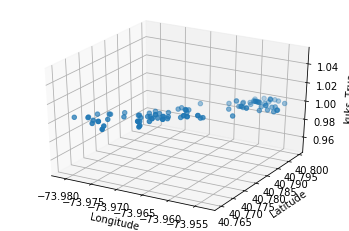

Hectare of Max Kuks Value: 38C


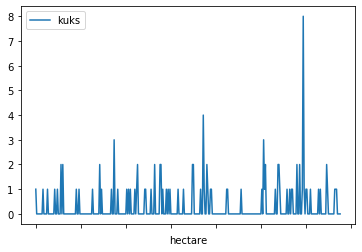

In [13]:
kuks_true = df[df['kuks'] == 1]

threedee1 = plt.figure().gca(projection='3d')
threedee1.scatter(kuks_true['long'], kuks_true['lat'], kuks_true['kuks'])
threedee1.set_xlabel('Longitude')
threedee1.set_ylabel('Latitude')
threedee1.set_zlabel('kuks_True')
plt.show()

eat_t_hec = kuks_true.groupby('hectare').count()
ax = eat_t_hec.plot(y='kuks')

print('Hectare of Max Kuks Value:', eat_t_hec.kuks.idxmax())

### _Quaas:_

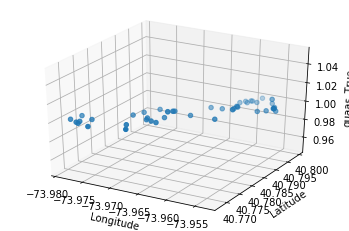

Hectare of Max Quaas Value: 38G


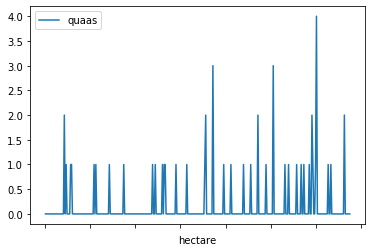

In [14]:
quaas_true = df[df['quaas'] == 1]

threedee1 = plt.figure().gca(projection='3d')
threedee1.scatter(quaas_true['long'], quaas_true['lat'], quaas_true['quaas'])
threedee1.set_xlabel('Longitude')
threedee1.set_ylabel('Latitude')
threedee1.set_zlabel('quaas_True')
plt.show()

eat_t_hec = quaas_true.groupby('hectare').count()
ax = eat_t_hec.plot(y='quaas')

print('Hectare of Max Quaas Value:', eat_t_hec.quaas.idxmax())

### _Moans:_

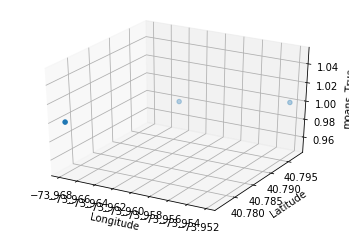

Hectare of Max Moans Value: 15G


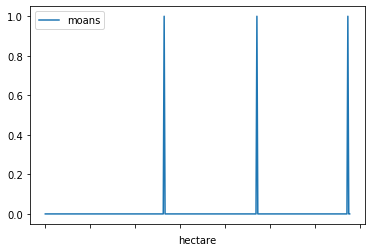

In [15]:
moans_true = df[df['moans'] == 1]

threedee1 = plt.figure().gca(projection='3d')
threedee1.scatter(moans_true['long'], moans_true['lat'], moans_true['moans'])
threedee1.set_xlabel('Longitude')
threedee1.set_ylabel('Latitude')
threedee1.set_zlabel('moans_True')
plt.show()

eat_t_hec = moans_true.groupby('hectare').count()
ax = eat_t_hec.plot(y='moans')

print('Hectare of Max Moans Value:', eat_t_hec.moans.idxmax())

### _Tail Twitches:_

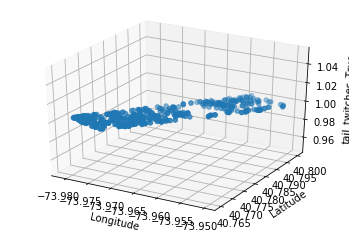

Hectare of Max Tail Twitches Value: 32D


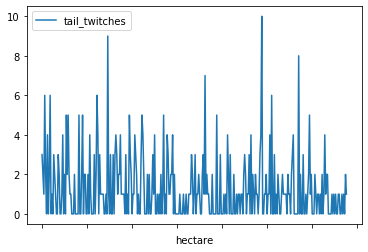

In [16]:
tail_twitches_true = df[df['tail_twitches'] == 1]

threedee1 = plt.figure().gca(projection='3d')
threedee1.scatter(tail_twitches_true['long'], tail_twitches_true['lat'], tail_twitches_true['tail_twitches'])
threedee1.set_xlabel('Longitude')
threedee1.set_ylabel('Latitude')
threedee1.set_zlabel('tail_twitches_True')
plt.show()

eat_t_hec = tail_twitches_true.groupby('hectare').count()
ax = eat_t_hec.plot(y='tail_twitches')

print('Hectare of Max Tail Twitches Value:', eat_t_hec.tail_twitches.idxmax())

### _Tail Flags:_

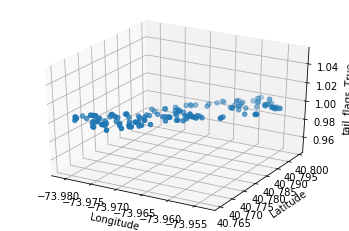

Hectare of Max Tail Flags Value: 38G


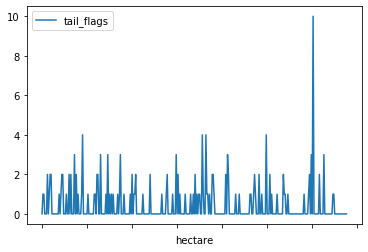

In [17]:
tail_flags_true = df[df['tail_flags'] == 1]

threedee1 = plt.figure().gca(projection='3d')
threedee1.scatter(tail_flags_true['long'], tail_flags_true['lat'], tail_flags_true['tail_flags'])
threedee1.set_xlabel('Longitude')
threedee1.set_ylabel('Latitude')
threedee1.set_zlabel('tail_flags_True')
plt.show()

eat_t_hec = tail_flags_true.groupby('hectare').count()
ax = eat_t_hec.plot(y='tail_flags')

print('Hectare of Max Tail Flags Value:', eat_t_hec.tail_flags.idxmax())

## Reactions

### _Approaches:_

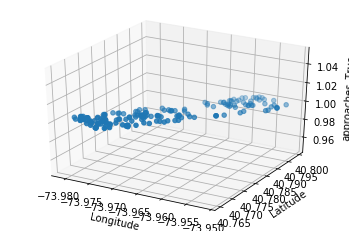

Hectare of Max approaches Value: 07H


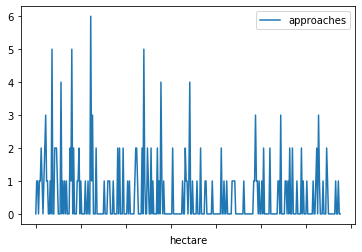

In [18]:
approaches_true = df[df['approaches'] == 1]

threedee1 = plt.figure().gca(projection='3d')
threedee1.scatter(approaches_true['long'], approaches_true['lat'], approaches_true['approaches'])
threedee1.set_xlabel('Longitude')
threedee1.set_ylabel('Latitude')
threedee1.set_zlabel('approaches_True')
plt.show()

eat_t_hec = approaches_true.groupby('hectare').count()
ax = eat_t_hec.plot(y='approaches')

print('Hectare of Max approaches Value:', eat_t_hec.approaches.idxmax())

### _Indifferent:_

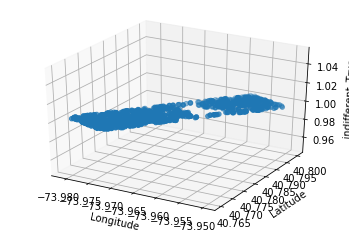

Hectare of Max indifferent Value: 01B


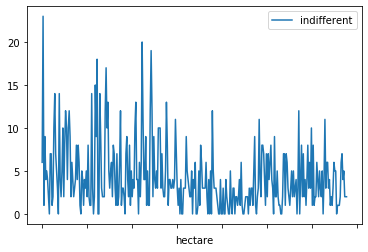

In [19]:
indifferent_true = df[df['indifferent'] == 1]

threedee1 = plt.figure().gca(projection='3d')
threedee1.scatter(indifferent_true['long'], indifferent_true['lat'], indifferent_true['indifferent'])
threedee1.set_xlabel('Longitude')
threedee1.set_ylabel('Latitude')
threedee1.set_zlabel('indifferent_True')
plt.show()

eat_t_hec = indifferent_true.groupby('hectare').count()
ax = eat_t_hec.plot(y='indifferent')

print('Hectare of Max indifferent Value:', eat_t_hec.indifferent.idxmax())

### _Runs From:_

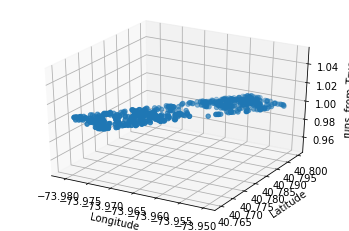

Hectare of Max runs_from Value: 32E


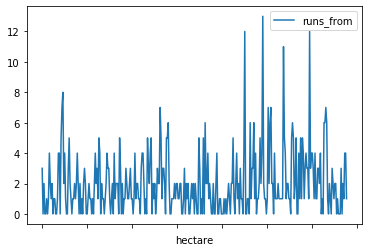

In [20]:
runs_from_true = df[df['runs_from'] == 1]

threedee1 = plt.figure().gca(projection='3d')
threedee1.scatter(runs_from_true['long'], runs_from_true['lat'], runs_from_true['runs_from'])
threedee1.set_xlabel('Longitude')
threedee1.set_ylabel('Latitude')
threedee1.set_zlabel('runs_from_True')
plt.show()

eat_t_hec = runs_from_true.groupby('hectare').count()
ax = eat_t_hec.plot(y='runs_from')

print('Hectare of Max runs_from Value:', eat_t_hec.runs_from.idxmax())

## Friendliness (Based on Jackson's Formula)

Hectare of Max friendliness Value: 14D


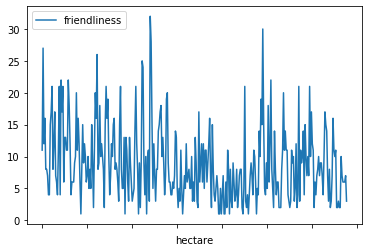

In [32]:
df_friend = df
df_friend['friendliness'] = df.approaches - df.tail_flags - df.runs_from

df_friend.head()

df_friend = df_friend.groupby('hectare').count()
ax = df_friend.plot(y='friendliness')

print('Hectare of Max friendliness Value:', df_friend.friendliness.idxmax())